<a href="https://colab.research.google.com/github/prabhat-parth/User-Identification-Using-Walking-Patterns/blob/master/WALKING_RECOGNITION_CLASSICAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

2.2.0-rc2


In [0]:
import numpy as np
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/walking/wlaking.csv")
data.head()
data.shape


(149332, 5)

In [0]:
#Check for Duplicates
print('No of duplicates in DATA: {}'.format(sum(data.duplicated())))


No of duplicates in DATA: 448


In [0]:
#Checking for NaN/null values
print('We have {} NaN/Null values in data'.format(data.isnull().values.sum()))
data.shape

We have 0 NaN/Null values in data


(149332, 5)

In [0]:
data.head()

,TIMESTAMP,X,Y,Z,USER
0,0.000000,0.69464,3.17350,7.5048,user1
1,0.030639,0.14982,3.48680,9.2755,user1
2,0.069763,-0.29965,1.94770,9.1120,user1
3,0.099823,-1.68890,1.41650,10.1200,user1
4,0.129820,-2.17930,0.95342,10.9240,user1


In [0]:
data['USER'].value_counts()

user17    21991
user18    20758
user20    16949
user14    12027
user22     9698
user9      7988
user4      6981
user13     6699
user11     5636
user1      5069
user6      4936
user12     4799
user2      3882
user7      3729
user15     3653
user8      3457
user10     3086
user21     3082
user16     1728
user3      1144
user5      1129
user19      911
Name: USER, dtype: int64

In [0]:
data['X'] = data['X'].astype('float')
data['Y'] = data['Y'].astype('float')
data['Z'] = data['Z'].astype('float')
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149332 entries, 0 to 149331
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   TIMESTAMP  149332 non-null  float64
 1   X          149332 non-null  float64
 2   Y          149332 non-null  float64
 3   Z          149332 non-null  float64
 4   USER       149332 non-null  object 
dtypes: float64(4), object(1)
memory usage: 5.7+ MB


(149332, 5)

In [0]:
Fs = 20
gt= data['USER'].value_counts().index
gt

Index(['user17', 'user18', 'user20', 'user14', 'user22', 'user9', 'user4',
       'user13', 'user11', 'user1', 'user6', 'user12', 'user2', 'user7',
       'user15', 'user8', 'user10', 'user21', 'user16', 'user3', 'user5',
       'user19'],
      dtype='object')

In [0]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['label'] = label.fit_transform(data['USER'])
data.head()

,TIMESTAMP,X,Y,Z,USER,label
0,0.000000,0.69464,3.17350,7.5048,user1,0
1,0.030639,0.14982,3.48680,9.2755,user1,0
2,0.069763,-0.29965,1.94770,9.1120,user1,0
3,0.099823,-1.68890,1.41650,10.1200,user1,0
4,0.129820,-2.17930,0.95342,10.9240,user1,0


In [0]:
label.classes_

array(['user1', 'user10', 'user11', 'user12', 'user13', 'user14',
       'user15', 'user16', 'user17', 'user18', 'user19', 'user2',
       'user20', 'user21', 'user22', 'user3', 'user4', 'user5', 'user6',
       'user7', 'user8', 'user9'], dtype=object)

In [0]:
X = data[['X', 'Y', 'Z']]
y = data['label']
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['X', 'Y', 'Z'])
scaled_X['label'] = y.values

scaled_X

,X,Y,Z,label
0,0.819672,-2.018554,2.207776,0
1,0.629638,-1.905540,2.770330,0
2,0.472862,-2.460726,2.718386,0
3,-0.011710,-2.652341,3.038629,0
4,-0.182762,-2.819384,3.294061,0
...,...,...,...,...
149327,0.178317,-0.967124,2.194814,14
149328,0.377849,-1.202964,2.623203,14
149329,0.311336,-1.035914,2.415490,14
149330,0.202070,-1.104703,2.099599,14


In [0]:
Fs = 50
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40


In [0]:
import math as m
def get_frames(data, frame_size):

  N_FEATURES = 3
  frames = []
  labels = []
  for i in range(0, len(scaled_X)- frame_size):
    x = data['X'].values[i: i + frame_size]
    y = data['Y'].values[i: i + frame_size]
    z = data['Z'].values[i: i + frame_size]
        # Retrieve the most often used label in this segment
    label = stats.mode(scaled_X['label'][i: i + frame_size])[0][0]
    frames.append([x, y, z])
    labels.append(label)
  # Bring the segments into a better shape
  frames = np.asarray(frames, dtype= np.float32).reshape(-1, frame_size, N_FEATURES)
  labels = np.asarray(labels)
  return frames, labels


In [0]:
X,y = get_frames(scaled_X, frame_size)

In [0]:
X.shape
#y.shape

(149132, 200, 3)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify = y)


In [0]:
X_train.shape, X_test.shape

((119305, 200, 3), (29827, 200, 3))

In [0]:
x_train_reshaped = X_train.reshape(119305, frame_size *3)
x_test_reshaped = X_test.reshape(29827,frame_size * 3)
x_train_reshaped.shape, x_test_reshaped.shape

((119305, 600), (29827, 600))

In [0]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import linear_model
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

In [0]:
classifiers = [
    linear_model.LogisticRegression(),
    #KNeighborsClassifier(3),
    #SVC(kernel="rbf", C=0.025, probability=True),
    #NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    #GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
    ]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression
****Results****
Accuracy: 35.5517%
Log Loss: 2.090612965735186
[[  48    0    0    0    0    0    0    0  876   67    0    0    0    0
     0    0    0    0    0    3    0    0]
 [   0    0    0    0    0    0    0    0  397  217    0    0    0    0
     0    0    0    0    0    3    0    0]
 [   0    0    1    0    0    0    0    0   90  914    0    0    0    0
     0    0  114    0    0    5    0    3]
 [  10    0    0   52   43    2    0    0  299   26    0    0   30    0
     0    0    0    0  431    5    0   62]
 [   0    0    0   39  575  314    5    1   18  128    0    1    6    1
     0    0    0    0  251    0    0    1]
 [   0    0    0    0    0 2359    0    0    1   46    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0   13  224    0    0   16  346    0    0   74    0
     0    0    0    0   25    3    0   30]
 [   0    0    1    0    8   14    0    0    5  226    0    0   40    0
     0    8    0    0   16   24    0    4

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.38      0.05      0.09       994
           1       0.00      0.00      0.00       617
           2       0.03      0.00      0.00      1127
           3       0.25      0.05      0.09       960
           4       0.58      0.43      0.49      1340
           5       0.65      0.98      0.78      2406
           6       0.00      0.00      0.00       731
           7       0.00      0.00      0.00       346
           8       0.20      0.30      0.24      4398
           9       0.17      0.26      0.20      4152
          10       0.81      0.70      0.75       182
          11       0.00      0.00      0.00       776
          12       0.50      0.96      0.66      3390
          13       0.50      0.00      0.00       616
          14       1.00      0.00      0.00      1920
          15       0.00      0.00      0.00       229
          16       0.18      0.17      0.18      1396
          17       0.03    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB
****Results****
Accuracy: 45.2375%
Log Loss: 15.608412217681707
[[ 782   16    0    4    0    0    0   34    0    9   32    0    0    0
   100    0    0   14    0    0    3    0]
 [  21  171    3    0    0    0    0   22    0   21   18    0    0    0
   346    0    7    8    0    0    0    0]
 [   4  473  321   11    0    0    0   23    0   13   44    0    0    0
   151    0    0   11    0   18   58    0]
 [   0    0    0  301    0    0    0   21    5   15   29    0    0   11
     0   28    0   22  528    0    0    0]
 [   0    0    0    0  549   18   71   39   39    0   75  348    2  119
     0    0    0   18   62    0    0    0]
 [   0    0    0    0   27 2183   56   45    0    0   95    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    2    0  488   21    0    0   24    0   80    0
    20   52    0    0   17   27    0    0]
 [  26   24    0    0    0    0    7   16    3   13   21    9    2   38
     3    0   95   33   10   38    8    0]
 [112

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.01      0.00      0.00       994
           1       0.00      0.00      0.00       617
           2       0.00      0.00      0.00      1127
           3       0.58      0.15      0.23       960
           4       0.38      0.18      0.24      1340
           5       0.65      0.98      0.78      2406
           6       0.00      0.00      0.00       731
           7       0.00      0.00      0.00       346
           8       0.23      0.37      0.28      4398
           9       0.18      0.26      0.22      4152
          10       0.36      0.75      0.48       182
          11       0.00      0.00      0.00       776
          12       0.34      0.96      0.50      3390
          13       0.00      0.00      0.00       616
          14       0.00      0.00      0.00      1920
          15       0.00      0.00      0.00       229
          16       0.08      0.01      0.02      1396
          17       0.30    

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis
****Results****
Accuracy: 71.5124%
Log Loss: 8.83508121046666
[[ 793    0    2    3    1   39    0    0    0   99    0   18    0    6
    27    0    1    0    0    0    0    5]
 [   0  477   16    0    0    0    0    0    0   97    0    0    0    0
    14    0    9    0    0    0    4    0]
 [   0    0  927    0    1   27    0    0    0  100    0   20    0    0
    28    0    1    0    0    0    0   23]
 [   0    0    0  790   11    1    0    0   14   83    0   18    0    7
     1    0   22    0    0    0    0   13]
 [   0    0    0    0 1129    0    0    0    9  162    0   21    0   10
     4    0    1    0    0    2    0    2]
 [   0    0    0    0  165 2037    0    0    1  158    0   16    0    0
    23    0    0    0    0    0    2    4]
 [   0    0    0    0   15   11  470    0    0  195    0    4    0    0
     5    0   28    0    0    0    0    3]
 [   0    0    0    8    7    0    2    3    1  292    0   26    0    0
     1    0    1    0    0    1

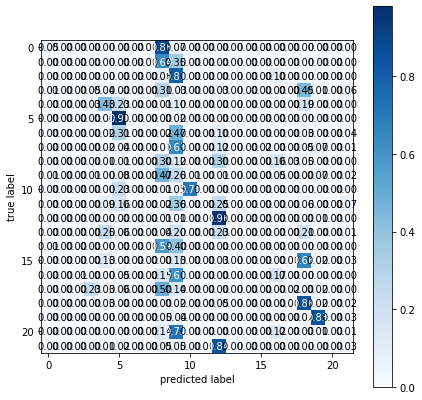

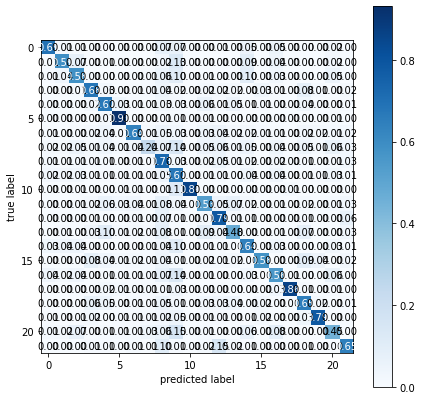

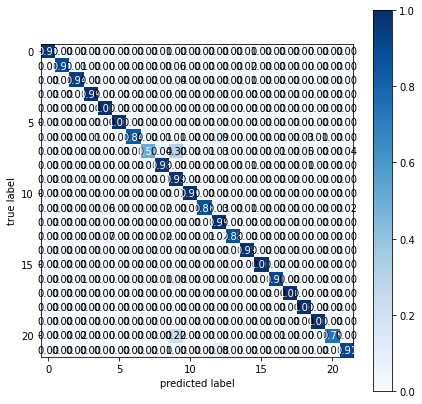

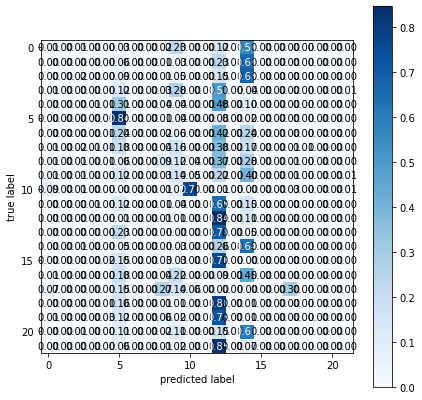

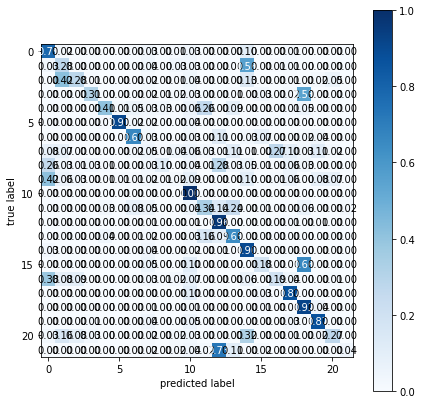

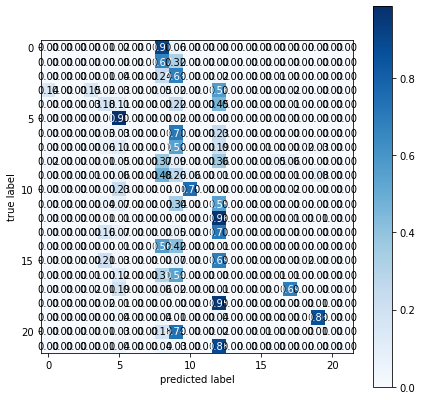

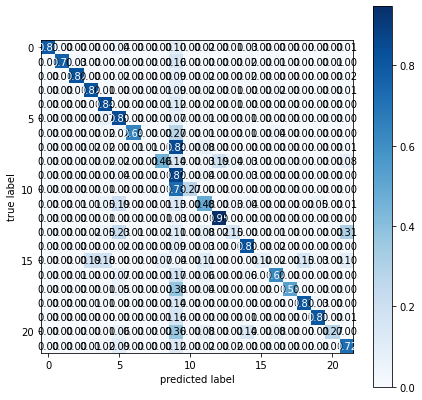

In [0]:
import time
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    start_time = time.time()
    clf.fit(x_train_reshaped, y_train)
    name = clf.__class__.__name__    
    print("="*30)
    print(name)
       
    print('****Results****')
    train_predictions = clf.predict(x_test_reshaped)
    
    acc = accuracy_score(y_test,train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    train_predictions = clf.predict_proba(x_test_reshaped)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry) 
    
    y_pred = clf.predict(x_test_reshaped)
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))  
    plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    print("--- %s seconds ---" % (time.time() - start_time))
    print("complete !!!")

print("="*30)

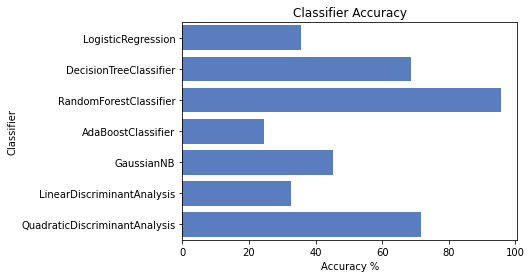

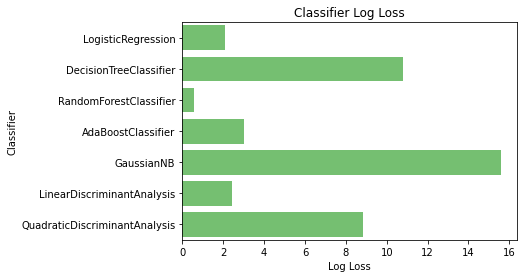

In [0]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()